# Training YOLO on generated Data<br>
The data should be contained in the folder generator data and 1 folder should be named background(case sensitive), all the objects should be separated in folders.

In [1]:
from python import dataGenerator
from IPython.display import display
from datetime import date

First we create the pictureCreator and two requiered properties:<br>
    - image_size: size to adjust the bigger side of the generated image<br>
    - elements_quantity_range: sets minimum and maximum number of elements in a generated picture<br>
Then we create an example picture

In [2]:
properties={'image_size':250,'elements_quantity_range':[5,30]}
pc=dataGenerator.PictureCreator(properties)
picture, info= pc.createPicture()

It Creates a picture and a list containing the boundaries and class of an element, we can also use the picturehandler.drawBoundaries() function to see the generated boundaries

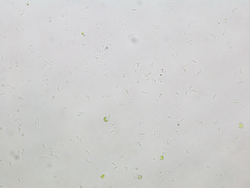

[[[96, 170, 11, 12], 0], [[25, 2, 5, 5], 0], [[157, 154, 8, 7], 0], [[131, 171, 13, 11], 0], [[237, 121, 9, 8], 0], [[101, 113, 10, 9], 0]]


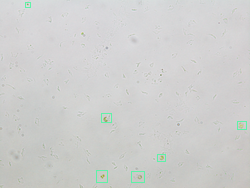

In [3]:
ph=dataGenerator.PictureHandler()
display(picture)
print(info)
display(ph.drawBoundaries(picture,info,pc.classNames))

Now we want to save the data

In [4]:
trainSetLenght=30
ah=dataGenerator.AnnotationHandler(cats=pc.classNames)
for i in range(trainSetLenght):
    trainPic,data=(pc.createPicture())
    filename=ah.generateData(trainPic,data)
    ph.save(trainPic,filename)
    print('\r', 'Created', i+1, 'of: ', trainSetLenght, end='')

 Created 30 of:  30

Once created we need to split data into train/test

In [5]:
ah.trainTestSplit(test_size=.2,random_state=1)